<a href="https://colab.research.google.com/github/racs2019/Data-Science-Basics-Series/blob/main/Kalman_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kalman Filter

This mini project focuses on exploring how the kalman filter can be used to estimate measurements. For this project we are given the real-world scenario of estimating the water level of a tank with a single level sensor. Through the different parts of the assignment different constraints are applied to the problem, with the water level being constant in some parts and rising in others as the water tap is opened.

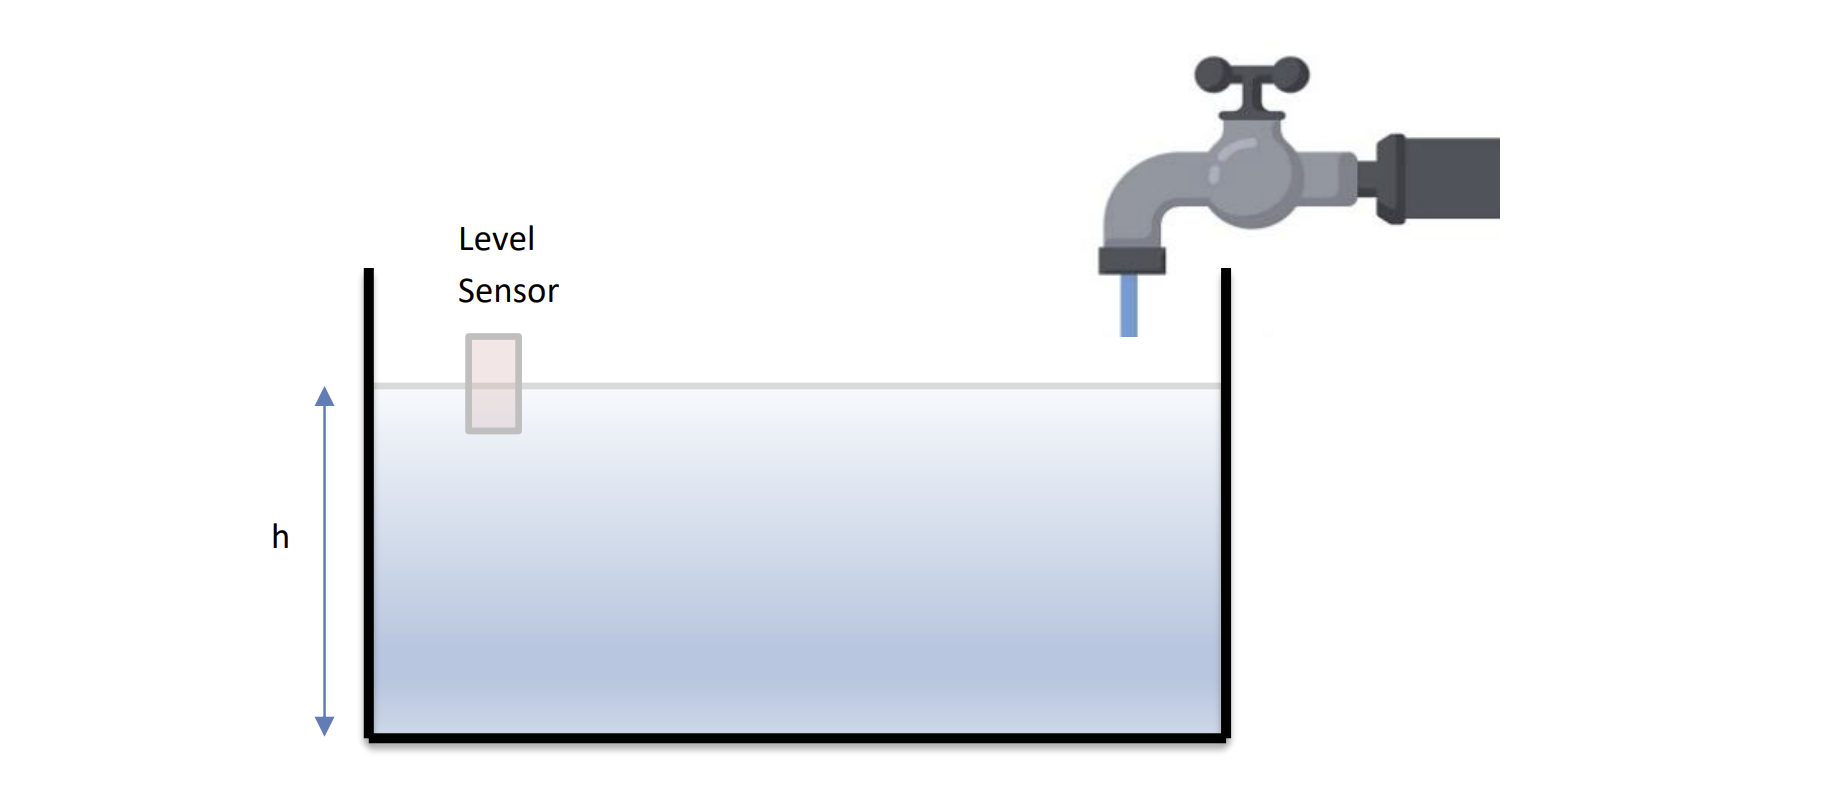

##Part 1

Assume that the tap is not adding any water to the tank and the level of the water is 1.0.
Also assume that 𝑥(𝑛) is the level of the water in the tank at time 𝑛.

###a)
The system is static. What are 𝐴 and 𝑢(𝑛)?






---



The equation to model the situation is represented by:

𝑥(𝑛 + 1) = 𝐴 𝑥(𝑛) + 𝐵 𝑢(𝑛) + 𝜀𝑝

In a static system, 𝑥(𝑛 + 1) = 𝑥(𝑛) since the environment is not changing and the position estimate should be exactly the same as the previous one. ***Thus, A = 1 and 𝑢(𝑛) = 0.***



---



###b)
We have only one sensor directly measuring the water level. What is 𝐶 ?





---



The equation to model the situation is represented by:

𝑦(𝑛) = 𝐶 𝑥(𝑛) + 𝜀𝑚

Since y is a scaler and x is a scaler, **𝐶 must also be a scaler since we only have one sensor. Additionally, since we only have one sensor, the value of C is 1.**



---



###c)
At the beginning, before making any measurement, we have no idea about the water level in the tank. So, we assume that 𝑥0|0 = 0.0. We also have no confidence
in this initial point. So, let’s assume that 𝑃0|0 = 1,000.0, a big number. Since our
state variable, water level, and the measurement, water level, are both scalars, then
noise covariance matrices are scalars or: 𝑄 = 𝑞 and 𝑅 = 𝑟. We are confident that we
are not adding water to the tank. So, let’s assume that 𝑞 = 0.0001 but sensor is very
noisy 𝑟 = 0.1. We make the first measurement and the number we read is: 𝑦(1) =
0.9. Use the Kalman filter to find the best first estimation of the water level using
the result of this measurement.




---



𝑥𝑛+1|𝑛 = 𝐴𝑥𝑛|𝑛 + 𝐵𝑢(𝑛 + 1)

𝑃𝑛+1|𝑛 = 𝐴𝑃𝑛|𝑛𝐴𝑇 + 𝑄

𝑥0|0 = 0.0

𝑥1|0 = 𝑥0|0 = 0.0

𝑃0|0 = 1,000.0

𝑃1|0 = 𝑃0|0 + 0.0001 = 1,000.0001

𝐾(𝑛) = 𝑃𝑛|𝑛−1 𝐶𝑇 [ 𝐶 𝑃𝑛|𝑛−1 𝐶𝑇 + 𝑅 ]^-1

𝐾(1) = 𝑃1|0 [ 𝑃1|0 + 0.1 ]^-1

𝐾(1) = (1,000.0001) [ (1,000.0001) + 0.1 ]^-1

𝐾(1) = 0.99990001


𝑃𝑛|𝑛 = [ I − 𝐾(𝑛) 𝐶 ]𝑃𝑛|𝑛−1

𝑃1|1 = [ 1 − 𝐾(1) 𝐶 ]𝑃1|0

𝑃1|1 = [ 1 − 0.99990001] * 1,000.0001

**𝑃1|1 = 0.099990009999**


𝑥𝑛|𝑛 = 𝑥𝑛|𝑛−1 + 𝐾(𝑛) [ 𝑦(𝑛) − 𝐶𝑥𝑛|𝑛−1 ]

𝑥1|1 = 𝑥1|0 + 𝐾(1) [ 𝑦(1) − 𝑥1|0 ]

𝑥1|1 = 0.0 + 0.99990001 [ 0.9 − 0 ]

**𝑥1|1 = 0.89991**


**Thus, the best first estimate of the water level using the first estimate is 0.89991, and the related covariance estimate is 0.099990009999**



---




###d)
Since we have very minimum confidence in our initial estimation of the water level
use the Maximum likelihood theory to find your estimation of the water level and
the related covariance matrix? Are these numbers close to what you calculated in
the previous question using the Kalman filter? Do they get closer if you increase
𝑃0|0 = 10,000?



---



𝑥1|1 =  (𝐶T R^-1 𝐶)^-1 CT R^-1 y

𝑥1|1 =  (10)^-1 (10) (0.9)

𝑥1|1 =  (0.1) (10) (0.9)

**𝑥1|1 =  0.9**



P1|1 =  (𝐶T R^-1 𝐶)^-1

P1|1 =  (10)^-1

**P1|1 =  (0.1)**


**Thus, since the matrix C is simply the 1x1 identiy matrix, the ML estimation just becomes the measurement itself, and the covariance is the covariance of the sensor. If we increase 𝑃0|0 = 10,000 then the kalman estimation and covaraince will get closer to the ML estimate since we have even less confidence in our initial estimate and will thus rely more on the first measurement value, bringing it closer to 0.9 (the first measurement).**


---



###e)
Now assume that we have made one measurement after another for a total of 10
measurements. The outcomes of these measurements are: 𝑦(1) = 0.9, 𝑦(2) =
0.8, 𝑦(3) = 1.1, 𝑦(4) = 1.0, 𝑦(5) = 0.95, 𝑦(6) = 1.05, 𝑦(7) = 1.2, 𝑦(8) =
0.9, 𝑦(9) = 0.85, 𝑦(10) = 1.15. Use Kalman filter iterations to update your
estimation of the water level and the corresponding variance after each
measurement. Plot the true value of the water level, all measurements, and the
Kalman estimations as a function of the iteration number in one graph.
Measurements are made once every second.

In [ ]:
#Dependencies used for the rest of the notebook
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class x_class:
  def __init__(self):
    self.x = {
      "00": 0,
      "10": 0,
      "11": 0,
      "21": 0,
      "22": 0,
      "32": 0,
      "33": 0,
      "43": 0,
      "44": 0,
      "54": 0,
      "55": 0,
      "65": 0,
      "66": 0,
      "76": 0,
      "77": 0,
      "87": 0,
      "88": 0,
      "98": 0,
      "99": 0,
      "109": 0,
      "1010": 0,
      "1110": 0,
      "1111": 0,
      "1211": 0,
      "1212": 0,
      "1312": 0,
      "1313": 0,
      "1413": 0,
      "1414": 0,
      "1514": 0,
      "1515": 0,
    }

In [ ]:
class p_class:
  def __init__(self):
    self.p = {
      "00": 1000.0,
      "10": 0,
      "11": 0,
      "21": 0,
      "22": 0,
      "32": 0,
      "33": 0,
      "43": 0,
      "44": 0,
      "54": 0,
      "55": 0,
      "65": 0,
      "66": 0,
      "76": 0,
      "77": 0,
      "87": 0,
      "88": 0,
      "98": 0,
      "99": 0,
      "109": 0,
      "1010": 0,
      "1110": 0,
      "1111": 0,
      "1211": 0,
      "1212": 0,
      "1312": 0,
      "1313": 0,
      "1413": 0,
      "1414": 0,
      "1514": 0,
      "1515": 0,
    }

In [ ]:
def kalman_loop1(p, x, q, r, k, y):
  for i in range(len(y)+1):
    if i > 0:
      x.x[str(i)+str(i-1)] = x.x[str(i-1)+str(i-1)]
      p.p[str(i)+str(i-1)] = p.p[str(i-1)+str(i-1)] + q
      k.append(p.p[str(i)+str(i-1)]*((p.p[str(i)+str(i-1)]+r)**-1))
      x.x[str(i)+str(i)] = x.x[str(i)+str(i-1)] + k[i-1]*(y[i-1]-x.x[str(i)+str(i-1)])
      p.p[str(i)+str(i)] = (1 - k[i-1]) * p.p[str(i)+str(i-1)]

In [ ]:
def plot_values(ke, tv, y):
  plt.plot(range(1, len(ke) + 1), ke, label='Kalman Estimation')
  plt.plot(range(1, len(tv) + 1), tv, label='True Value')
  plt.plot(range(1, len(y) + 1), y, label='Sensor Measurement')

  plt.title("Water Level Measurments vs Estimations")
  plt.xlabel("Time (s)")
  plt.ylabel("Water level")
  plt.legend()

  plt.show()

In [ ]:
p = p_class()
x = x_class()

q = 0.0001
r = 0.1
k = []
y = [0.9, 0.8, 1.1, 1.0, 0.95, 1.05, 1.2, 0.9, 0.85, 1.15]

kalman_loop1(p, x, q, r, k, y)

In [ ]:
print('Covairance Value Estimations:')
print('-----------------------------')
for i in range (0, 11):
  print('x ', i, '|', i, ':')
  print(p.p[str(i)+str(i)])

Covairance Value Estimations:
-----------------------------
x  0 | 0 :
1000.0
x  1 | 1 :
0.09999000100102431
x  2 | 2 :
0.05002249012958519
x  3 | 3 :
0.033387728971401714
x  4 | 4 :
0.025086747096114054
x  5 | 5 :
0.02011933985054867
x  6 | 6 :
0.016818708101112894
x  7 | 7 :
0.01447048840676666
x  8 | 8 :
0.012717488254947607
x  9 | 9 :
0.011361260078740935
x  10 | 10 :
0.010282729686210452


In [ ]:
kalman_estimates = []
true_value = []

for i in range (1, 11):
  kalman_estimates.append(x.x[str(i)+str(i)])
  true_value.append(1)

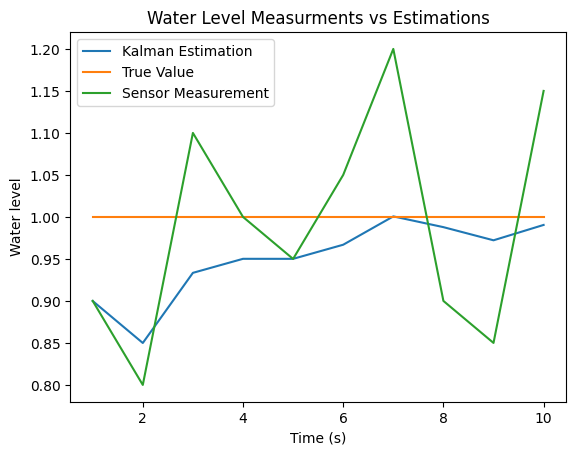

In [ ]:
plot_values(kalman_estimates, true_value, y)

How many seconds does it take for the
estimations to be within the 5% range of the accurate level? Notice that the
measurements are about 20% above or below the actual level.


**As shown in the graph above, it takes around 4 seconds for the estimations to be in within the 5% range of the actual level.**

##Part 2

Now assume that someone opens the tap to add water to the tank without telling us. At the
beginning the tank is empty, 𝑥(0) = 0.0, but the level goes up by 0.1 unit per second.
However, we still assume that the system is static.

### a)
As before we initialize the iteration with 𝑥 0|0 = 0 and 𝑟 = 0.1, 𝑞 = 0.0001. We use Kalman estimation filter to update our estimations based on the recoded measurements. This time measurements are: 𝑦(1) = 0.11, 𝑦(2) = 0.29, 𝑦(3) = 0.32, 𝑦(4) = 0.50, 𝑦(5) = 0.58, 𝑦(6) = 0.54, 𝑦(7) = 0.63, 𝑦(8) = 0.64, 𝑦(9) = 0.78, 𝑦(10) = 1.1, 𝑦(11) = 0.95, 𝑦(12) = 1.4, 𝑦(13) = 1.4, 𝑦(14) = 1.6, 𝑦(15) = 1.42. Actual water level changes as: 𝑥(0) = 0.0, 𝑥(1) = 0.1, 𝑥(2) = 0.2, … , 𝑥(15) = 1.5. Use the Kalman filter to estimate the level of water using these measurements and
the model you have in mind for the dynamics of the system. Plot the actual water
level, measurements, and Kalman estimations as a function of time in one graph.

####**Q = 0.0001**

In [ ]:
p = p_class()
x = x_class()

q = 0.0001
r = 0.1
k = []
y = [0.11, 0.29, 0.32, 0.50, 0.58, 0.54, 0.63, 0.64, 0.78, 1.1, 0.95, 1.4, 1.4, 1.6, 1.42]

kalman_loop1(p, x, q, r, k, y)

In [ ]:
print('Covairance Value Estimations:')
print('-----------------------------')
for i in range (0, 16):
  print('x ', i, '|', i, ':')
  print(p.p[str(i)+str(i)])

Covairance Value Estimations:
-----------------------------
x  0 | 0 :
1000.0
x  1 | 1 :
0.09999000100102431
x  2 | 2 :
0.05002249012958519
x  3 | 3 :
0.033387728971401714
x  4 | 4 :
0.025086747096114054
x  5 | 5 :
0.02011933985054867
x  6 | 6 :
0.016818708101112894
x  7 | 7 :
0.01447048840676666
x  8 | 8 :
0.012717488254947607
x  9 | 9 :
0.011361260078740935
x  10 | 10 :
0.010282729686210452
x  11 | 11 :
0.009406117891563169
x  12 | 12 :
0.00868090119035766
x  13 | 13 :
0.008072098221535968
x  14 | 14 :
0.007554719152067797
x  15 | 15 :
0.0071104352994085795


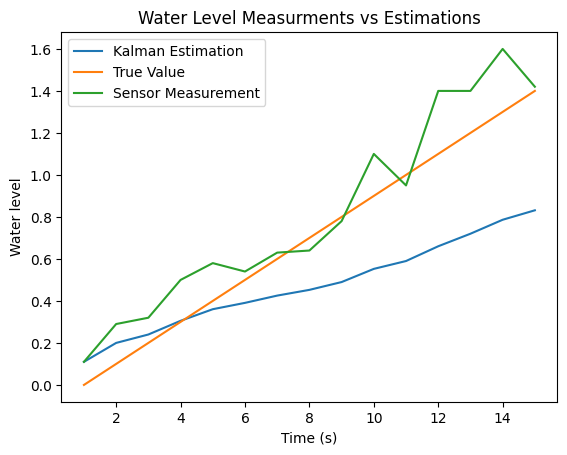

In [ ]:
kalman_estimates00001 = []
true_value = []

for i in range (1, 16):
  kalman_estimates00001.append(x.x[str(i)+str(i)])
  true_value.append((i-1)*0.1)

plot_values(kalman_estimates00001, true_value, y)

What is the problem here? Seems estimations are not close to the actual values and
the system has a biased error! Why? Can we do better? What would you change to
make it better (without changing your dynamics)?

**The problem is that when we modeled the system using our initial equation, we inaccurately described the dynamics of the situation as a stationary water level. Thus, our simulation portion of the Kalman filter estimate is inaccurate due to incorrect assumptions of the dynamics. Additionally, we are confident in the incorrect dynamic that we are not adding water to the tank, and we set our Q value as 0.0001. Thus, we lean more towards the simulation value instead of the measurement when calculating the Kalman estimation, which causes the estimations to not be close to the actual values. Without changing the dynamics, one thing that we could to improve the Kalman estimation would be to increase the Q value to reflect our uncertainty in the dynamics of the environment. By doing this and experimenting with how increasing the Q value affects the estimation, we can improve the overall Kalman estimation.**

###b)
A problem in the previous section is that you have a wrong impression about what is
happening in the system (you assume that the system is static, but the water tap is
actually adding water to the tank). But the main challenge is that we have good
confidence in that wrong assumption reflected in out very low 𝑞 = 0.0001 value.
Let’s say that we are not very sure about the dynamics (because we cannot monitor
the system closely and it is possible that someone without our knowledge goes and
open that tap). To add this uncertainty, we change 𝑞 = 0.01. Now, re-run the
Kalman estimations and compute the water level estimations after each
measurement. Is it better now?

####**Q = 0.01**

In [ ]:
p = p_class()
x = x_class()

q = 0.01
r = 0.1
k = []
y = [0.11, 0.29, 0.32, 0.50, 0.58, 0.54, 0.63, 0.64, 0.78, 1.1, 0.95, 1.4, 1.4, 1.6, 1.42]

kalman_loop1(p, x, q, r, k, y)

In [ ]:
print('Covairance Value Estimations:')
print('-----------------------------')
for i in range (0, 16):
  print('x ', i, '|', i, ':')
  print(p.p[str(i)+str(i)])

Covairance Value Estimations:
-----------------------------
x  0 | 0 :
1000.0
x  1 | 1 :
0.09999000109990017
x  2 | 2 :
0.052378684948705616
x  3 | 3 :
0.038415562343303025
x  4 | 4 :
0.032621621061079846
x  5 | 5 :
0.029884403741860775
x  6 | 6 :
0.028512402151323796
x  7 | 7 :
0.027804298787085704
x  8 | 8 :
0.027433323285143064
x  9 | 9 :
0.027237443139956227
x  10 | 10 :
0.027133588536753107
x  11 | 11 :
0.02707840503043567
x  12 | 12 :
0.027049049062252445
x  13 | 13 :
0.02703342293562612
x  14 | 14 :
0.02702510244746877
x  15 | 15 :
0.027020671239171713


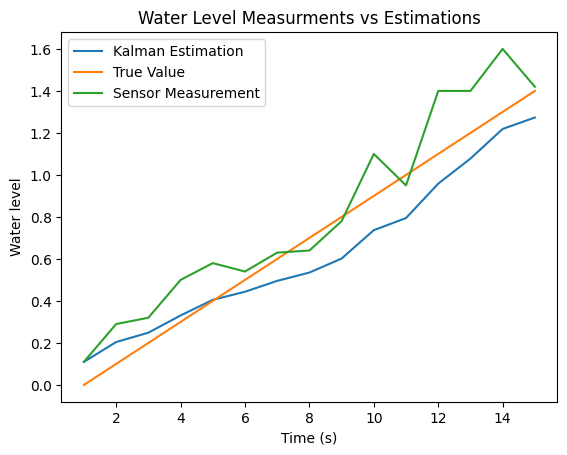

In [ ]:
kalman_estimates001 = []
true_value = []

for i in range (1, 16):
  kalman_estimates001.append(x.x[str(i)+str(i)])
  true_value.append((i-1)*0.1)

plot_values(kalman_estimates001, true_value, y)

Is the estimation better now?

**Yes, the estimation has improved by increasing the q value to 0.01 to reflect the uncertainty in the dynamic of the system. As shown in the graph above, the Kalman estimation now follows the general slope and trend of the measurements and is much closer to the true value than when q was 0.0001. This is because the higher q value adds more weight to the measurement when combining the simulation and estimate to create the Kalman estimate than before. Although this improved the estimation, I think that an even higher q value would generate further improvements.**

####**Q = 0.1**

Increase the value to 𝑞 = 0.1. Is it even better than
last trial?

In [ ]:
p = p_class()
x = x_class()

q = 0.1
r = 0.1
k = []
y = [0.11, 0.29, 0.32, 0.50, 0.58, 0.54, 0.63, 0.64, 0.78, 1.1, 0.95, 1.4, 1.4, 1.6, 1.42]

kalman_loop1(p, x, q, r, k, y)

In [ ]:
print('Covairance Value Estimations:')
print('-----------------------------')
for i in range (0, 16):
  print('x ', i, '|', i, ':')
  print(p.p[str(i)+str(i)])

Covairance Value Estimations:
-----------------------------
x  0 | 0 :
1000.0
x  1 | 1 :
0.09999000199953378
x  2 | 2 :
0.0666655557407025
x  3 | 3 :
0.062499843775385464
x  4 | 4 :
0.06190473923269553
x  5 | 5 :
0.06181817851293152
x  6 | 6 :
0.0618055550733805
x  7 | 7 :
0.061803713457504225
x  8 | 8 :
0.06180344477190468
x  9 | 9 :
0.061803405571257984
x  10 | 10 :
0.061803399851961885
x  11 | 11 :
0.06180339901752782
x  12 | 12 :
0.06180339889578554
x  13 | 13 :
0.06180339887802358
x  14 | 14 :
0.06180339887543217
x  15 | 15 :
0.061803398875054046


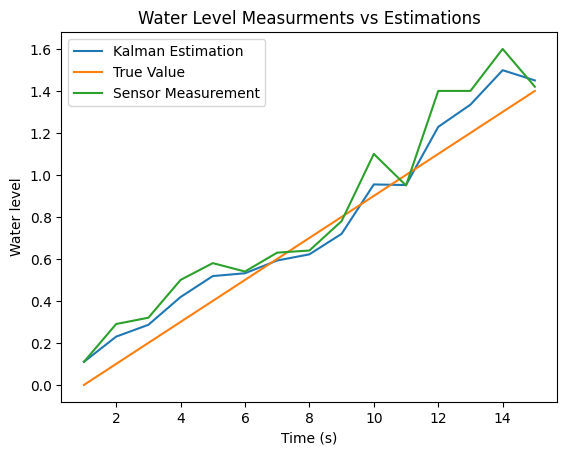

In [ ]:
kalman_estimates01 = []
true_value = []

for i in range (1, 16):
  kalman_estimates01.append(x.x[str(i)+str(i)])
  true_value.append((i-1)*0.1)

plot_values(kalman_estimates01, true_value, y)

Is the estimation even better than last trial?

**Yes, increasing the q value to 0.1 has further improved the Kalman estimation. As shown in the graph, the estimation better follows the overall trend of the measurements while smoothing out some of the noise. This allows the estimation to stay closer to the true value than in the graphs of the lower q values.**

####**Q = 1**

Increase the value to 𝑞 = 1.0. What did you learn?

In [ ]:
p = p_class()
x = x_class()

q = 1
r = 0.1
k = []
y = [0.11, 0.29, 0.32, 0.50, 0.58, 0.54, 0.63, 0.64, 0.78, 1.1, 0.95, 1.4, 1.4, 1.6, 1.42]

kalman_loop1(p, x, q, r, k, y)

In [ ]:
print('Covairance Value Estimations:')
print('-----------------------------')
for i in range (0, 16):
  print('x ', i, '|', i, ':')
  print(p.p[str(i)+str(i)])

Covairance Value Estimations:
-----------------------------
x  0 | 0 :
1000.0
x  1 | 1 :
0.0999900109880637
x  2 | 2 :
0.09166659729795082
x  3 | 3 :
0.0916083911199035
x  4 | 4 :
0.0916079812172172
x  5 | 5 :
0.09160797833043631
x  6 | 6 :
0.09160797831010593
x  7 | 7 :
0.09160797830996273
x  8 | 8 :
0.0916079783099616
x  9 | 9 :
0.09160797830996163
x  10 | 10 :
0.09160797830996163
x  11 | 11 :
0.09160797830996163
x  12 | 12 :
0.09160797830996163
x  13 | 13 :
0.09160797830996163
x  14 | 14 :
0.09160797830996163
x  15 | 15 :
0.09160797830996163


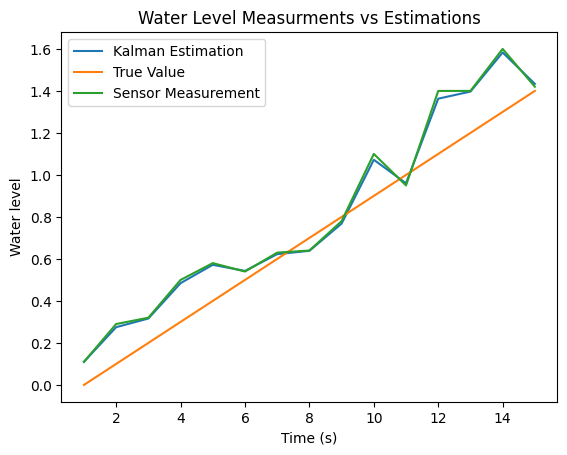

In [ ]:
kalman_estimates1 = []
true_value = []

for i in range (1, 16):
  kalman_estimates1.append(x.x[str(i)+str(i)])
  true_value.append((i-1)*0.1)

plot_values(kalman_estimates1, true_value, y)

Plot the actual values,
measurements, and Kalman estimations for these different cases in one plot. What
did you learn?

**I learned that changing the q value can be used to adjust the situation and improve the estimate when you have a poorly modeled equation for the behavior of the environment. In our situation, our equation assumed that the water level was stationary and that the estimates should remain the same. However, by increasing the q value and decreasing our confidence in that assumption, we were able to give more weight to the measurement portion of the Kalman estimation and improve our overall Kalman estimation. I also learned that the more you increase the q value, the closer the estimation fits to the measurements. This is shown in the graph above, with the large q value of 1 causing the Kalman estimation to fit very closely to the measurements. Since it fit very closely, it also captured the noise of the sensors and did not reflect the actual water level any better than the measurements. Thus, I learned that when finding the best q value it is best to find the value that captures the trend of the measurements without fitting too closely in order to better generalize to the actual value in this situation. When experimenting with the q values, the best q value was 0.1, showing that depending on the situation and sensor noise choosing the largest q value may not always reflect the situation the best.**

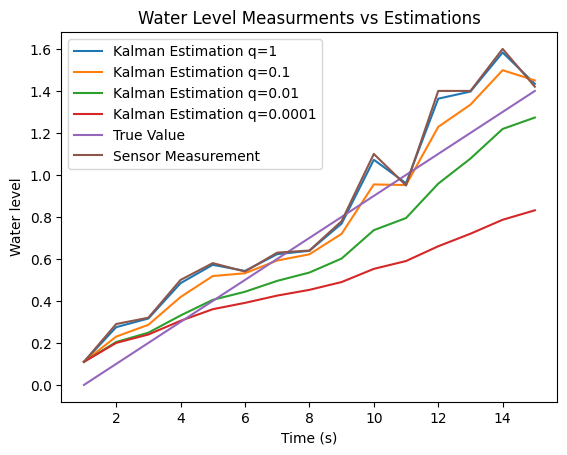

In [ ]:
#plot all kalman estimations in one plot
plt.plot(range(1, len(kalman_estimates1) + 1), kalman_estimates1, label='Kalman Estimation q=1')
plt.plot(range(1, len(kalman_estimates01) + 1), kalman_estimates01, label='Kalman Estimation q=0.1')
plt.plot(range(1, len(kalman_estimates001) + 1), kalman_estimates001, label='Kalman Estimation q=0.01')
plt.plot(range(1, len(kalman_estimates00001) + 1), kalman_estimates00001, label='Kalman Estimation q=0.0001')
plt.plot(range(1, len(true_value) + 1), true_value, label='True Value')
plt.plot(range(1, len(y) + 1), y, label='Sensor Measurement')

plt.title("Water Level Measurments vs Estimations")
plt.xlabel("Time (s)")
plt.ylabel("Water level")
plt.legend()

plt.show()

##Part 3

Let consider the case that we know that we are adding water to the system with the
rate of 0.1 increase in the water level per second. We can consider this as an input to
the system or use this trick. Let’s assume that our state variable is a vector with two
elements: 𝑥 = [ 𝑥1 𝑥2] 𝑇. 𝑥1 is the water level in the tank and 𝑥2 = 𝑑𝑥1/𝑑𝑡 or the rate of change in the water level. Then we can assume that:



𝐴 = [1 ∆𝑡], [0 1]


Now, we don’t need to add the input to the system, and we assume that 𝑢(𝑛) =
0.0. Here, our time steps are ∆𝑡 = 1.0 second. Measurements are scalar as before and
we are directly measuring the water level.

###a)

Assume that once we initialize the iterations with: 𝑥
0|0 = [𝑥1 0|0 𝑥2 0|0 ] 𝑇 = [0 0] 𝑇, 𝑟 = 0.1 and: 𝑃 0|0 = [1,000 0], [0 1,000], 𝑄 = [𝑞/3 𝑞/2], [𝑞/2 𝑞] where 𝑞 = 0.0001. Use the previous measurements and run the Kalman filter estimation filter. Plot the actual values, measurements, and the estimation values in one plot.

In [ ]:
class x_class2:
  def __init__(self):
    self.x = {
      "00": np.zeros((2,1)),
      "10": np.zeros((2,1)),
      "11": np.zeros((2,1)),
      "21": np.zeros((2,1)),
      "22": np.zeros((2,1)),
      "32": np.zeros((2,1)),
      "33": np.zeros((2,1)),
      "43": np.zeros((2,1)),
      "44": np.zeros((2,1)),
      "54": np.zeros((2,1)),
      "55": np.zeros((2,1)),
      "65": np.zeros((2,1)),
      "66": np.zeros((2,1)),
      "76": np.zeros((2,1)),
      "77": np.zeros((2,1)),
      "87": np.zeros((2,1)),
      "88": np.zeros((2,1)),
      "98": np.zeros((2,1)),
      "99": np.zeros((2,1)),
      "109": np.zeros((2,1)),
      "1010": np.zeros((2,1)),
      "1110": np.zeros((2,1)),
      "1111": np.zeros((2,1)),
      "1211": np.zeros((2,1)),
      "1212": np.zeros((2,1)),
      "1312": np.zeros((2,1)),
      "1313": np.zeros((2,1)),
      "1413": np.zeros((2,1)),
      "1414": np.zeros((2,1)),
      "1514": np.zeros((2,1)),
      "1515": np.zeros((2,1)),
    }

In [ ]:
class p_class2:
  def __init__(self):
    self.p = {
      "00": np.array([[1000.0, 0], [0, 1000.0]]),
      "10": np.zeros((2,2)),
      "11": np.zeros((2,2)),
      "21": np.zeros((2,2)),
      "22": np.zeros((2,2)),
      "32": np.zeros((2,2)),
      "33": np.zeros((2,2)),
      "43": np.zeros((2,2)),
      "44": np.zeros((2,2)),
      "54": np.zeros((2,2)),
      "55": np.zeros((2,2)),
      "65": np.zeros((2,2)),
      "66": np.zeros((2,2)),
      "76": np.zeros((2,2)),
      "77": np.zeros((2,2)),
      "87": np.zeros((2,2)),
      "88": np.zeros((2,2)),
      "98": np.zeros((2,2)),
      "99": np.zeros((2,2)),
      "109": np.zeros((2,2)),
      "1010": np.zeros((2,2)),
      "1110": np.zeros((2,2)),
      "1111": np.zeros((2,2)),
      "1211": np.zeros((2,2)),
      "1212": np.zeros((2,2)),
      "1312": np.zeros((2,2)),
      "1313": np.zeros((2,2)),
      "1413": np.zeros((2,2)),
      "1414": np.zeros((2,2)),
      "1514": np.zeros((2,2)),
      "1515": np.zeros((2,2)),
    }

In [ ]:
def kalman_loop2(p, x, q, r, k, y):
  A = np.array([[1,1], [0,1]])
  C = np.ones((1,2))
  for i in range(len(y)+1):
    if i > 0:
      x.x[str(i)+str(i-1)] = np.dot(A, x.x[str(i-1)+str(i-1)])
      p.p[str(i)+str(i-1)] = np.dot(np.dot(A, p.p[str(i-1)+str(i-1)]), np.transpose(A)) + q
      part1 = np.dot(p.p[str(i)+str(i-1)], np.transpose(C))
      part2 = np.dot(np.dot(C, p.p[str(i)+str(i-1)]), np.transpose(C)) + r
      k.append(part1*((part2)**-1))
      x.x[str(i)+str(i)] = x.x[str(i)+str(i-1)] + np.dot(k[i-1],(y[i-1]-np.dot(C, x.x[str(i)+str(i-1)])))
      p.p[str(i)+str(i)] = np.dot((np.eye(2) - np.dot(k[i-1], C)), p.p[str(i)+str(i-1)])

In [ ]:
x = x_class2()
p = p_class2()

q_val = 0.0001
q = np.array([[q_val/3, q_val/2], [q_val/2, q_val/1]])
r = 0.1
k = []
y = [0.11, 0.29, 0.32, 0.50, 0.58, 0.54, 0.63, 0.64, 0.78, 1.1, 0.95, 1.4, 1.4, 1.6, 1.42]

kalman_loop2(p, x, q, r, k, y)

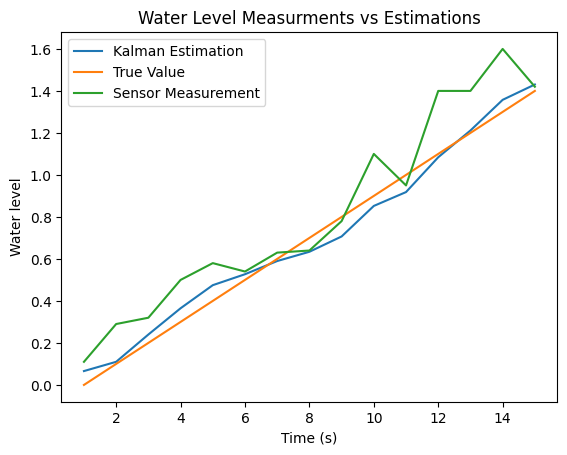

In [ ]:
kalman_estimates = []
true_value = []

for i in range (1, 16):
  kalman_estimates.append(x.x[str(i)+str(i)][0])
  true_value.append((i-1)*0.1)

plot_values(kalman_estimates, true_value, y)

In [ ]:
print('Covairance Value Estimations:')
print('-----------------------------')
for i in range (0, 16):
  print('x ', i, '|', i, ':')
  print(p.p[str(i)+str(i)])

Covairance Value Estimations:
-----------------------------
x  0 | 0 :
[[1000.    0.]
 [   0. 1000.]]
x  1 | 1 :
[[ 200.03601661 -199.97601781]
 [-199.97601781  200.01601701]]
x  2 | 2 :
[[ 0.09993337 -0.09986343]
 [-0.09986343  0.19974357]]
x  3 | 3 :
[[ 3.33396268e-02 -3.32609979e-06]
 [-3.32609979e-06  4.99916666e-02]]
x  4 | 4 :
[[0.03000513 0.0099906 ]
 [0.0099906  0.02003102]]
x  5 | 5 :
[[0.03000483 0.0099921 ]
 [0.0099921  0.01006288]]
x  6 | 6 :
[[0.0295306  0.00857211]
 [0.00857211 0.00580979]]
x  7 | 7 :
[[0.02858583 0.00716049]
 [0.00716049 0.00370048]]
x  8 | 8 :
[[0.02741314 0.005996  ]
 [0.005996   0.00254411]]
x  9 | 9 :
[[0.02617611 0.00507886]
 [0.00507886 0.00186412]]
x  10 | 10 :
[[0.02496616 0.0043657 ]
 [0.0043657  0.00144376]]
x  11 | 11 :
[[0.02383116 0.00381291]
 [0.00381291 0.00117453]]
x  12 | 12 :
[[0.02279455 0.00338499]
 [0.00338499 0.00099788]]
x  13 | 13 :
[[0.02186631 0.00305456]
 [0.00305456 0.00088026]]
x  14 | 14 :
[[0.02104879 0.00280068]
 [0.002800

How do you
evaluate the results?

**The graph and estimates show that the vector arrangement trick works very well to model the dynamics of the system without changing the equation to include an input to they system. This is because by utilizing the rate of change of the water level 𝑥2 = 𝑑𝑥1/𝑑t, the system can adapt to unforeseen dynamics of the system even though the initial equation is modeled after a stationary water level. The graph shows that the estimation is very close to the actual water level and generalizes the noise of the measurements, and it a much better estimation than any of the estimation curves using higher q values from before.**

###b)

Now assume that someone closed the tap when the level was at 1.0 without
telling you. So, you still think that you are adding water to the tank. Do you think
with this vector arrangement you can tolerate this problem and come up with
good estimations? Can you test it?

**Yes, I think that the vector arrangement can still tolerate this problem. This is because the vector arrangement trick combines the value of both the water level estimate as well as the rate of change estimate to get the estimate for the water level at the next time stamp. By utilizing the rate of change of the water level 𝑥2 = 𝑑𝑥1/𝑑t, the system can adapt to unforeseen dynamics of the system even though the initial equation is modeled after a stationary water level. Thus, I think that through the vector arrangement the system will be able to adapt to the increasing water level that stagnates at 1 since it will keep track of an estimate of the rate of change. The code cells below test how the vector arrangement would work on measurements that increase up to 1 and then stagnate. The measurements are the measurements from part 2 up to 1.1, and then all of the measurements from part 1, which fluctuate around a water level of 1. As you can see by the graph below, the Kalman estimate is able to adapt to and tolerate the change in system dynamics. The estimate initially follows the steady increase in water level well, and then it starts to slow down and decrease in slope after the water level stagnates. Although the vector arrangement produces a higher estimate of the water level when the system reaches stagnation, given more data points the estimate would also stagnate and produce a good estimate of the actual water level. One thing that we could do to help the estimate return to the correct dynamic sooner could be to increase the q value so that we have less confidence in our estimate dynamics and give slightly more weight to the measurements. We re-run the estimation with a higher q of 0.01 and display the second graph, which shows a much better estimate which quickly adapts to the sudden stagnation.**

####**Q = 0.0001**

In [ ]:
x = x_class2()
p = p_class2()

q_val = 0.0001
q = np.array([[q_val/3, q_val/2], [q_val/2, q_val/1]])
r = 0.1
k = []
y = [0.11, 0.29, 0.32, 0.50, 0.58, 0.54, 0.63, 0.64, 0.78, 1.1, 0.9, 0.8, 1.1, 1.0, 0.95, 1.05, 1.2, 0.9, 0.85, 1.15] #new y

kalman_loop2(p, x, q, r, k, y)

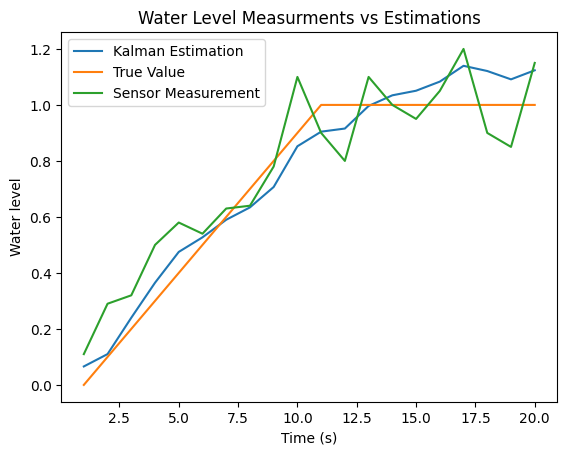

In [ ]:
kalman_estimates = []
true_value = []

for i in range (1, 21):
  kalman_estimates.append(x.x[str(i)+str(i)][0])
  if (i-1)*0.1 <= 1:
    true_value.append((i-1)*0.1)
  else:
    true_value.append(1)

plot_values(kalman_estimates, true_value, y)

####**Q = 0.01**

In [ ]:
x = x_class2()
p = p_class2()

q_val = 0.01
q = np.array([[q_val/3, q_val/2], [q_val/2, q_val/1]])
r = 0.1
k = []
y = [0.11, 0.29, 0.32, 0.50, 0.58, 0.54, 0.63, 0.64, 0.78, 1.1, 0.9, 0.8, 1.1, 1.0, 0.95, 1.05, 1.2, 0.9, 0.85, 1.15] #new y

kalman_loop2(p, x, q, r, k, y)

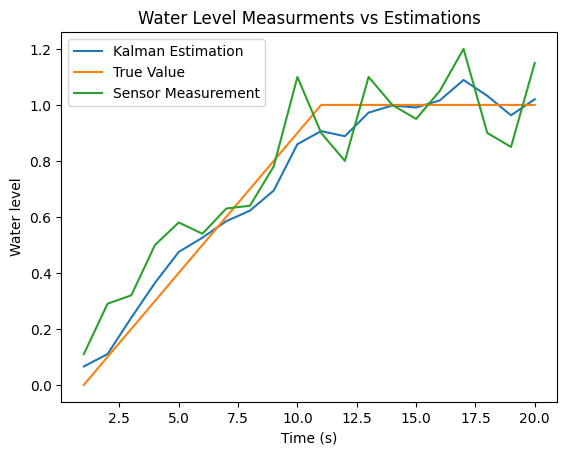

In [ ]:
kalman_estimates = []
true_value = []

for i in range (1, 21):
  kalman_estimates.append(x.x[str(i)+str(i)][0])
  if (i-1)*0.1 <= 1:
    true_value.append((i-1)*0.1)
  else:
    true_value.append(1)

plot_values(kalman_estimates, true_value, y)